In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
class Dense():
  def __init__(self,i,j):
    self.weights = np.random.randn(j,i)
    self.biases = np.random.randn(j,1)

  def forward_propagation(self,inpx):
    self.inpx = inpx
    return (np.dot(self.weights,self.inpx)+self.biases)

  def backward_propagation(self,DelE_DelY, alpha):
    DelE_DelW = np.matmul(DelE_DelY,self.inpx.T)
    DelE_DelX = np.matmul(self.weights.T,DelE_DelY)
    self.weights -= alpha*DelE_DelW
    self.biases -= alpha*DelE_DelY
    return DelE_DelX

In [3]:
class Activation():
  def __init__(self,act,act_prime):
   self.act = act
   self.prime = act_prime

  def forward_propagation(self,inpx):
   self.inpx = inpx
   return  self.act(self.inpx)

  def backward_propagation(self,DelE_DelY,alpha):
   return DelE_DelY*self.prime(self.inpx)


In [4]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

In [5]:
def mse(y_true,y_pred):
  return np.sum(np.mean((y_pred-y_true)**2))

In [6]:
def mse_prime(y_true,y_pred):
  return 2*(y_pred - y_true)/y_true.shape[0]

In [7]:
def predict(network,inpx):
  output = inpx
  for layer in (network):
    output  = layer.forward_propagation(output)
  return output


In [8]:
def train(network,loss,loss_prime,x_train,y_train,count = 100,learning_rate=0.1):

 for e in range(count):
  error = 0
  for x,y in zip(x_train,y_train):
    output = predict(network,x)
    error += loss(y,output)
    grad = loss_prime(y,output)

    for layer in reversed(network):
     grad = layer.backward_propagation(grad,learning_rate)
  print(f"{e + 1}/{count}, error={error}")

In [9]:
def preprocess_data(x, y, limit):
    x = x.reshape(x.shape[0],784, 1)
    x = x.astype("float32") / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]




In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 5000)
x_test, y_test = preprocess_data(x_test, y_test, 50)

network = [Dense(784,40),
           Tanh(),
           Dense(40,10),
           Tanh(),]

train(network, mse, mse_prime, x_train, y_train, count=500, learning_rate=0.1)


11490434/11490434 [==============================] - 0s 0us/step
1/500, error=3667.60270982928
2/500, error=1405.9669795880347
3/500, error=615.3370066862625
4/500, error=516.5729298133099
5/500, error=473.5206477686281
6/500, error=445.34348605300136
7/500, error=426.525141740888
8/500, error=412.6682391600081
9/500, error=401.8282993351966
10/500, error=392.0460282134823
11/500, error=383.33318473921014
12/500, error=374.67076581195647
13/500, error=366.23012865110434
14/500, error=358.0161586278918
15/500, error=350.4074500691701
16/500, error=343.67811204122955
17/500, error=336.89942181706425
18/500, error=330.4869429452448
19/500, error=324.4726550913526
20/500, error=319.08335598365755
21/500, error=313.7863661895801
22/500, error=309.1040037065742
23/500, error=304.867992605398
24/500, error=300.7640037696028
25/500, error=296.84198558274824
26/500, error=292.8715030689954
27/500, error=288.2057633343353
28/500, error=283.641770918299
29/500, error=279.09562544360983
30/500, er

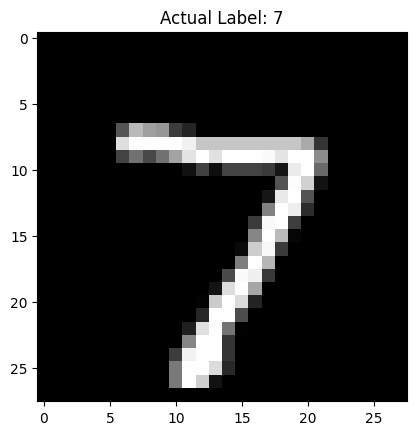

Predicted Label: 7


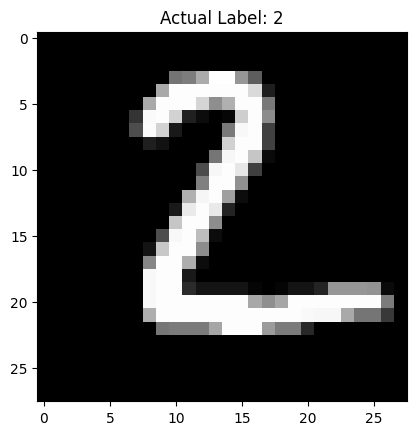

Predicted Label: 2


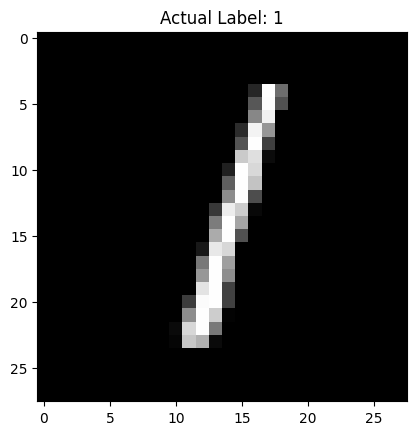

Predicted Label: 1


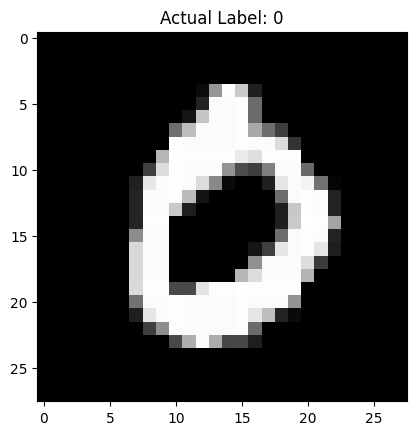

Predicted Label: 0


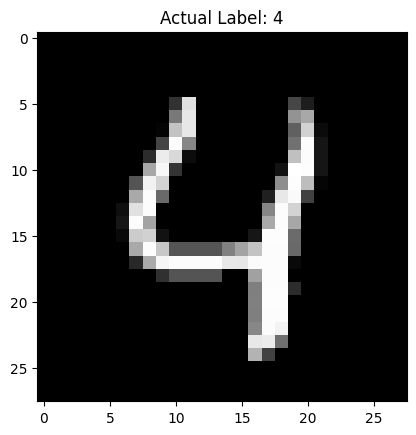

Predicted Label: 4


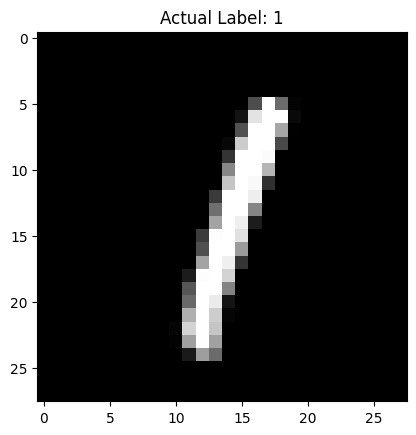

Predicted Label: 1


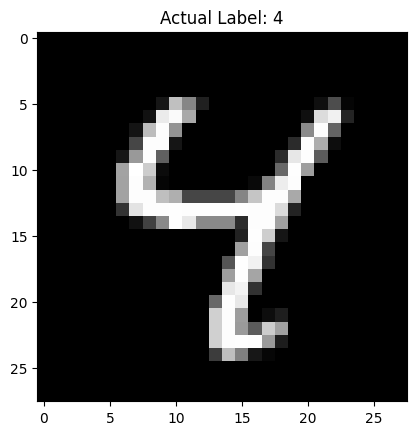

Predicted Label: 4


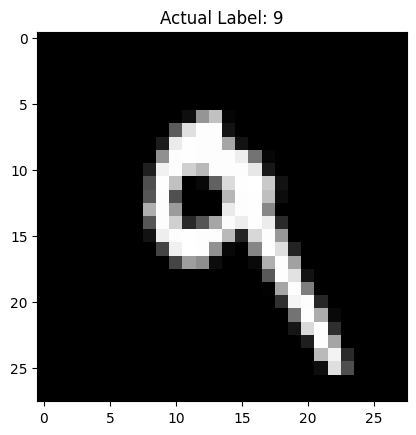

Predicted Label: 9


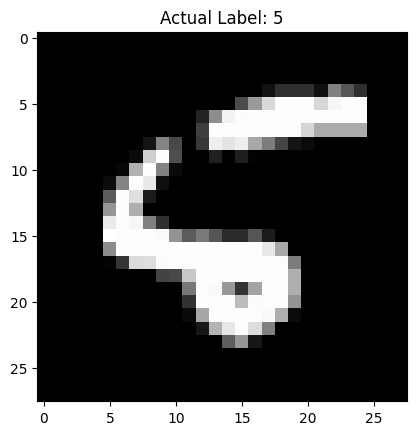

Predicted Label: 5


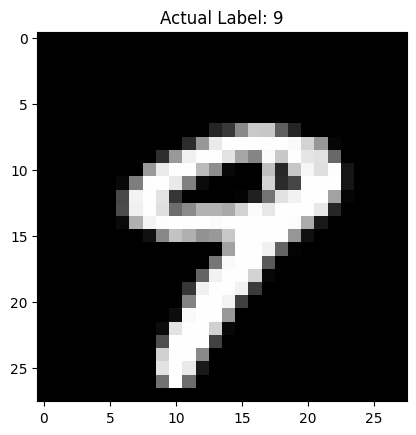

Predicted Label: 9


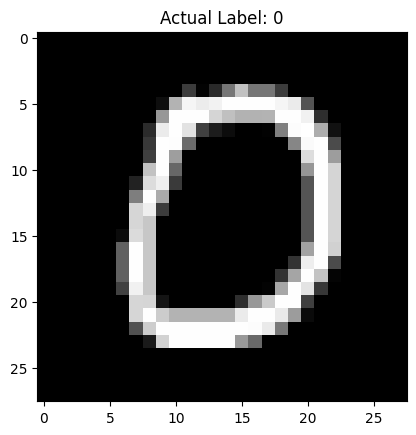

Predicted Label: 0


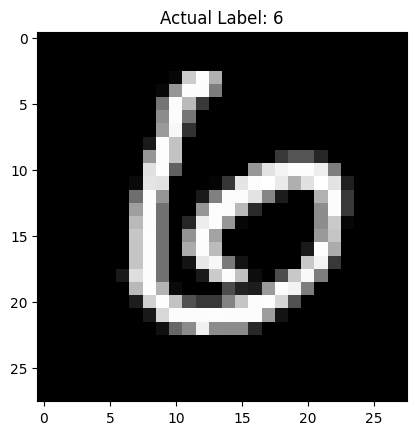

Predicted Label: 5


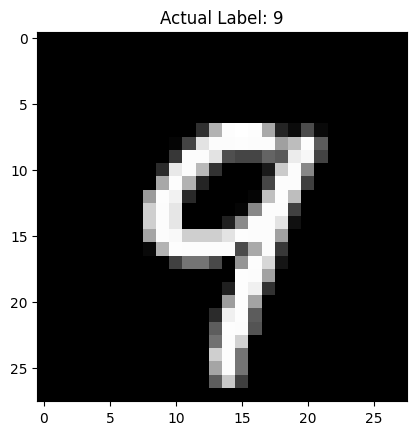

Predicted Label: 9


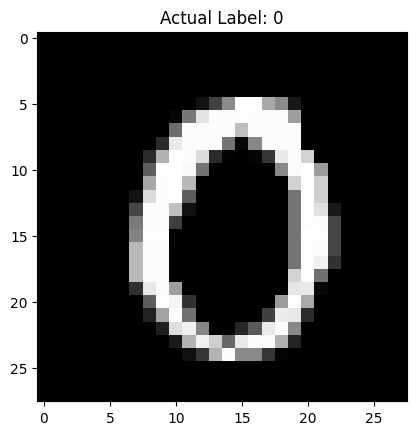

Predicted Label: 0


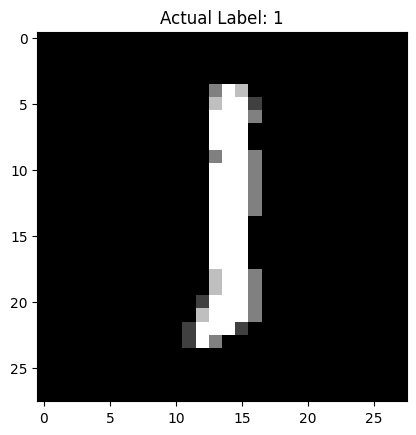

Predicted Label: 1


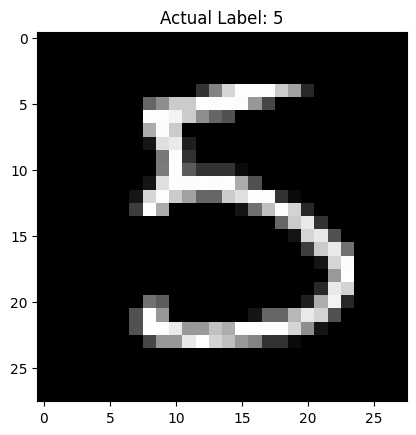

Predicted Label: 8


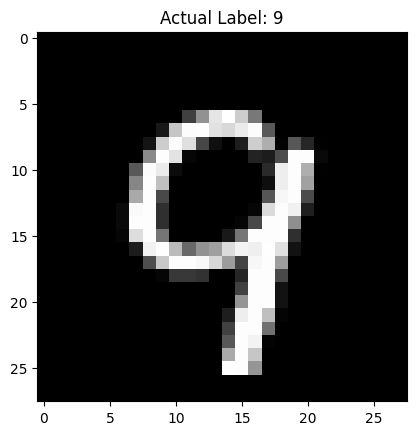

Predicted Label: 9


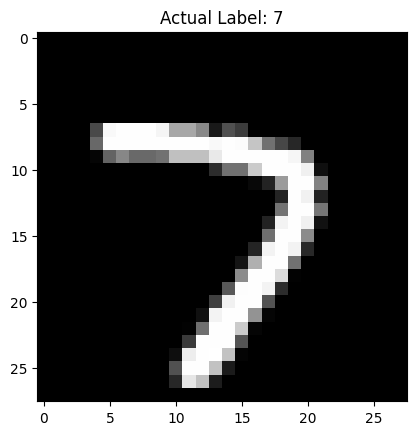

Predicted Label: 7


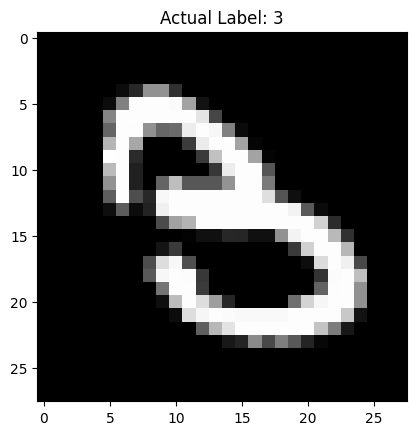

Predicted Label: 8


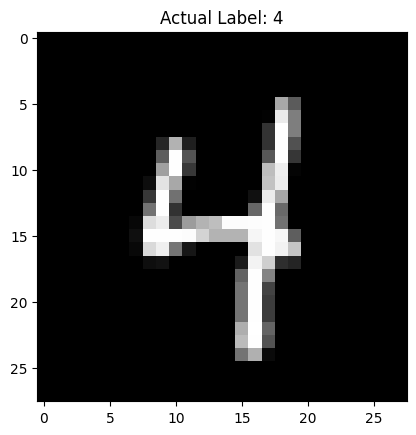

Predicted Label: 4


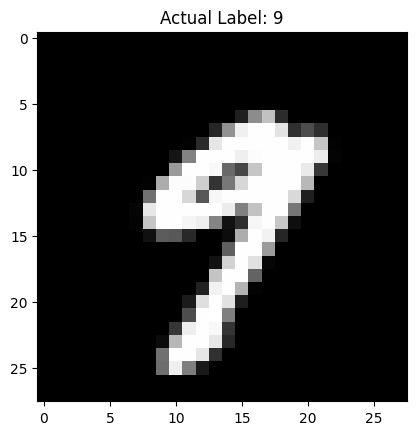

Predicted Label: 9


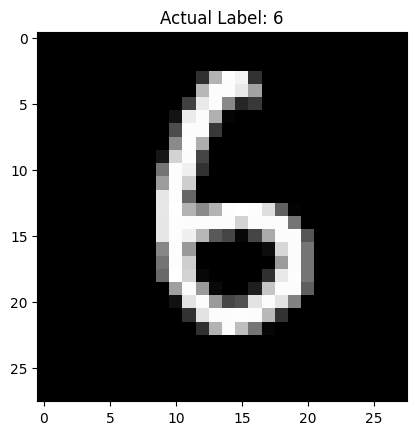

Predicted Label: 6


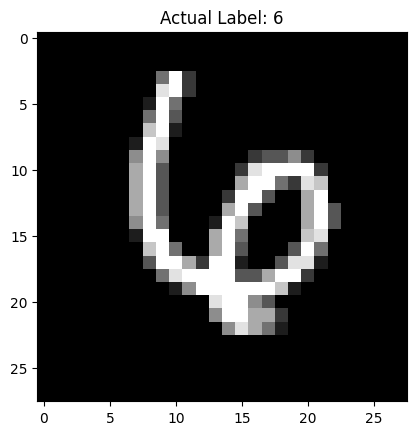

Predicted Label: 6


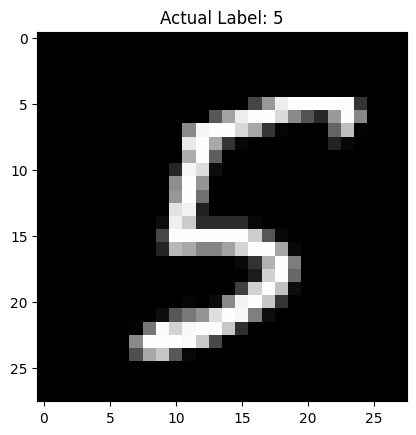

Predicted Label: 5


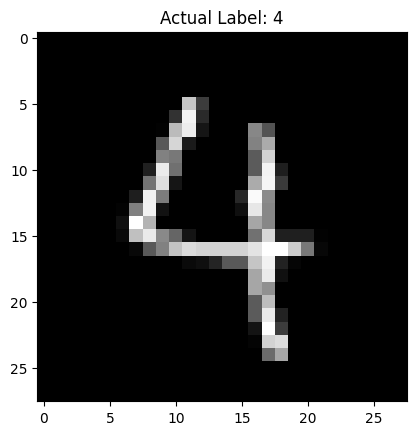

Predicted Label: 4


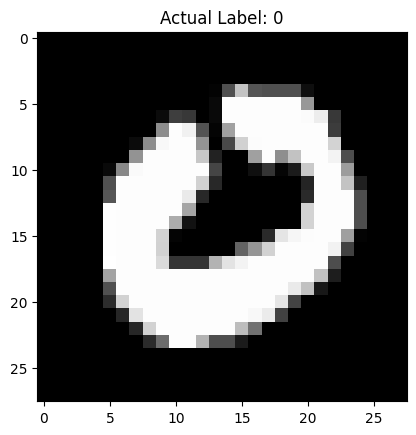

Predicted Label: 0


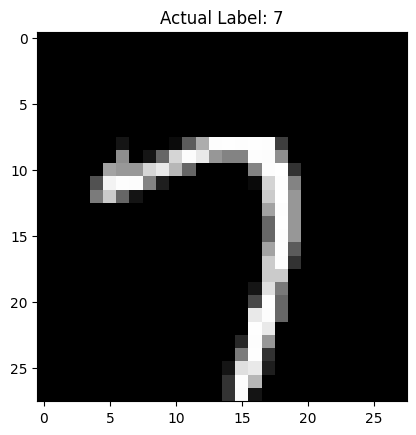

Predicted Label: 7


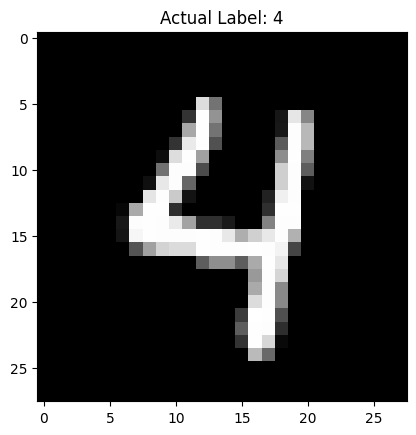

Predicted Label: 4


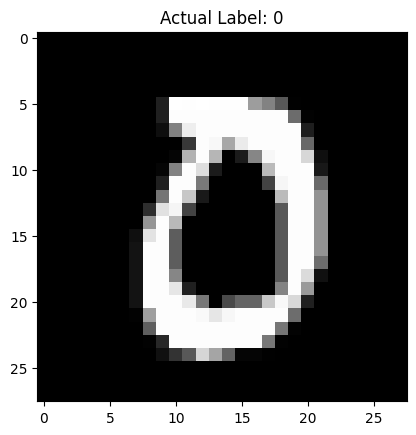

Predicted Label: 0


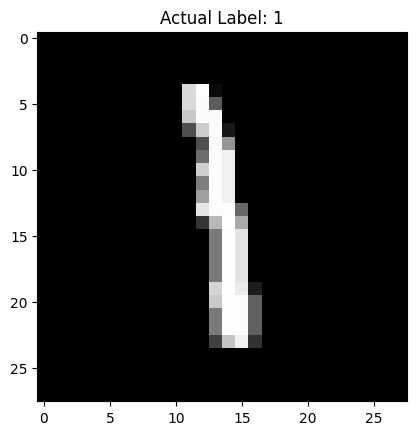

Predicted Label: 1


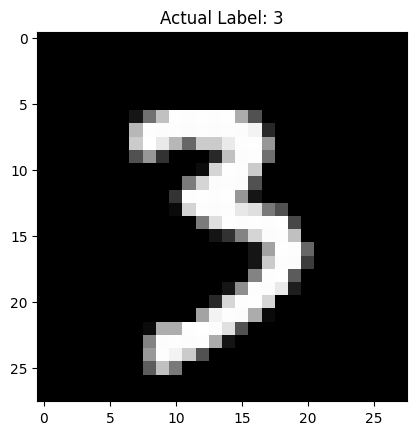

Predicted Label: 3


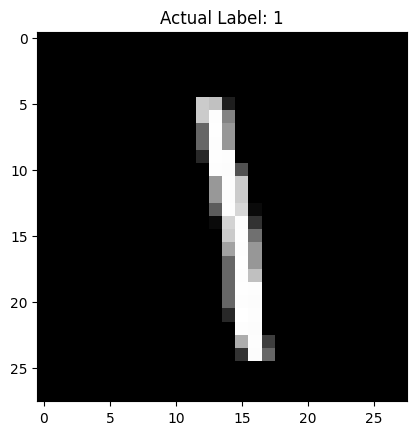

Predicted Label: 1


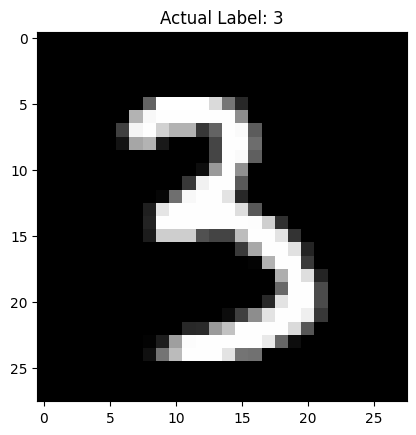

Predicted Label: 3


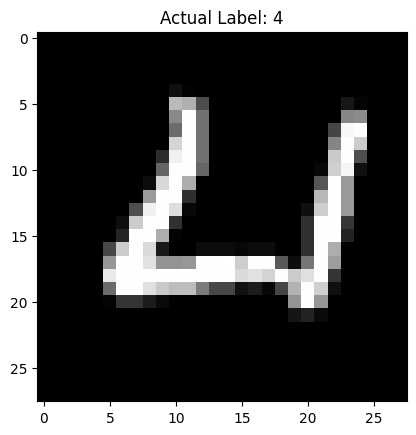

Predicted Label: 0


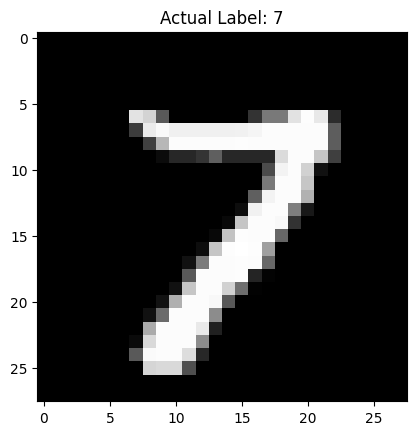

Predicted Label: 7


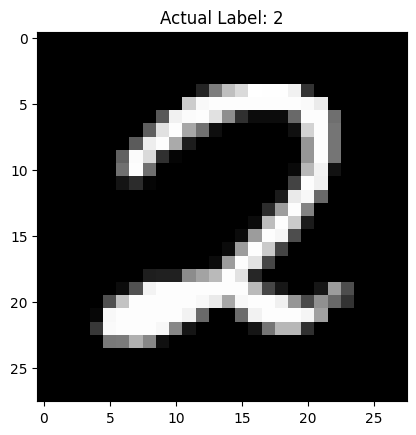

Predicted Label: 2


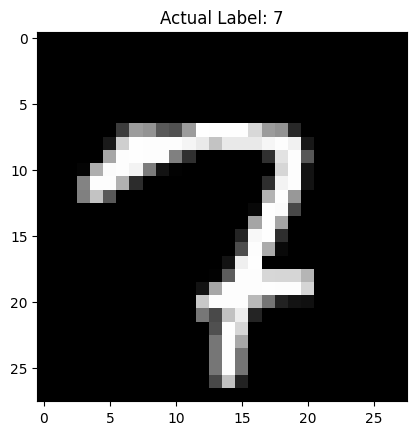

Predicted Label: 7


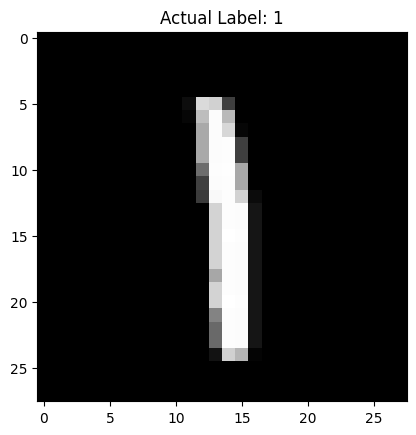

Predicted Label: 1


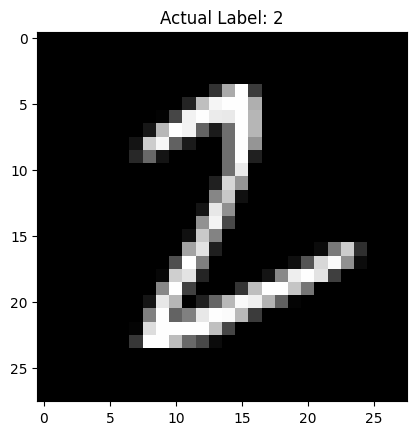

Predicted Label: 3


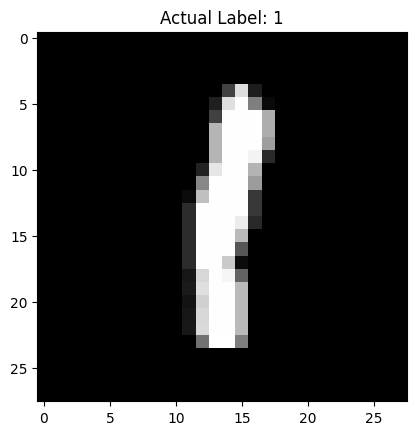

Predicted Label: 1


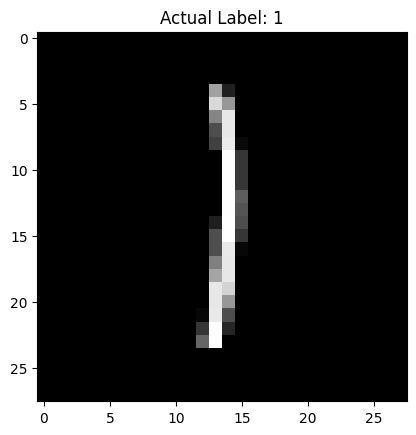

Predicted Label: 1


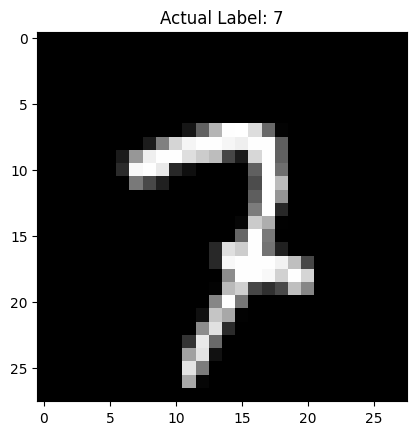

Predicted Label: 7


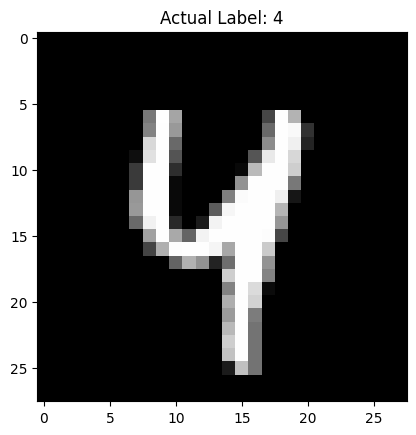

Predicted Label: 4


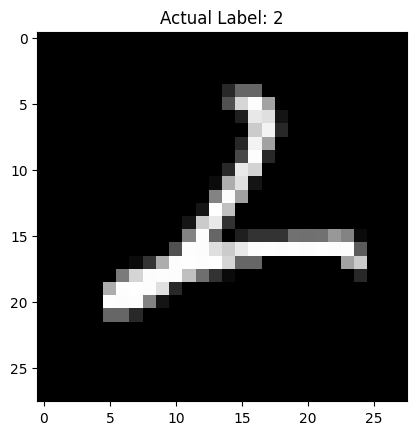

Predicted Label: 2


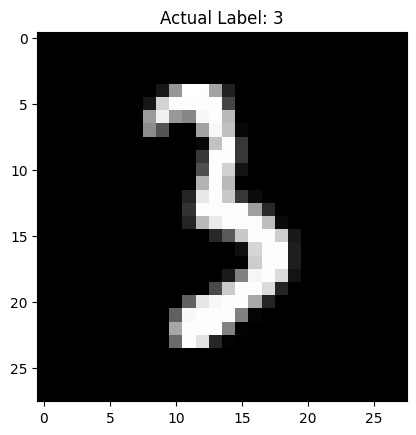

Predicted Label: 3


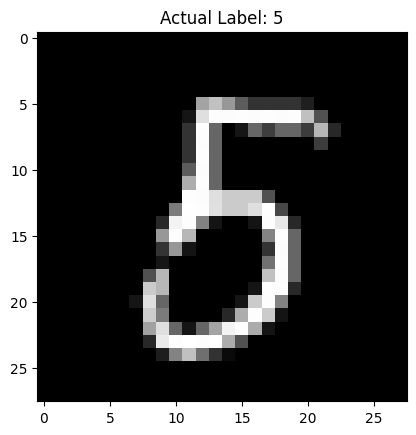

Predicted Label: 5


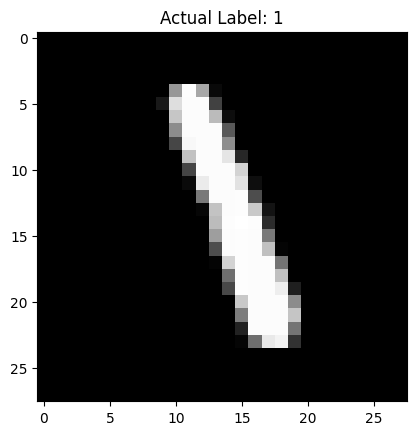

Predicted Label: 8


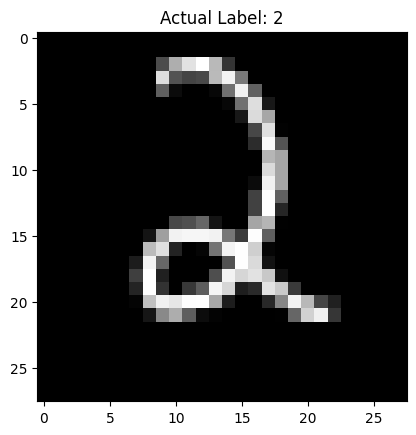

Predicted Label: 2


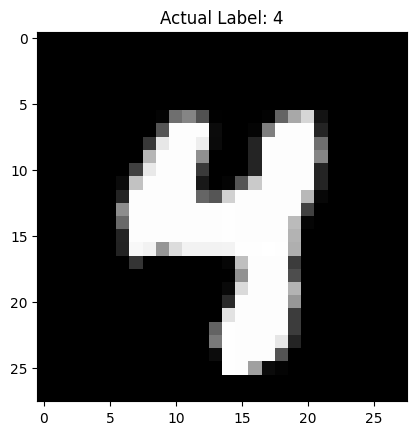

Predicted Label: 4


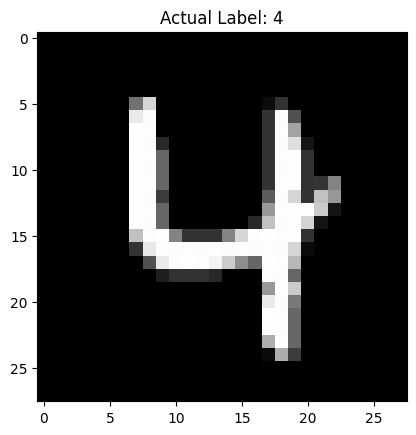

Predicted Label: 4


In [11]:
for x, y in zip(x_test, y_test):
    output = predict(network, x)


    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title('Actual Label: {}'.format(np.argmax(y)))
    plt.show()


    print('Predicted Label:', np.argmax(output))
